In [20]:
from sklearn.datasets._samples_generator import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X, y_true = make_blobs(n_samples=50, centers=4, n_features=3,
                       cluster_std=0.60, random_state=0,)

In [21]:
def WireframeSphere(centre=[0.,0.,0.], radius=1.,
                    n_meridians=20, n_circles_latitude=None):
    """
    Create the arrays of values to plot the wireframe of a sphere.

    Parameters
    ----------
    centre: array like
        A point, defined as an iterable of three numerical values.
    radius: number
        The radius of the sphere.
    n_meridians: int
        The number of meridians to display (circles that pass on both poles).
    n_circles_latitude: int
        The number of horizontal circles (akin to the Equator) to display.
        Notice this includes one for each pole, and defaults to 4 or half
        of the *n_meridians* if the latter is larger.

    Returns
    -------
    sphere_x, sphere_y, sphere_z: arrays
        The arrays with the coordinates of the points to make the wireframe.
        Their shape is (n_meridians, n_circles_latitude).

    Examples
    --------
    >>> fig = plt.figure()
    >>> ax = fig.gca(projection='3d')
    >>> ax.set_aspect("equal")
    >>> sphere = ax.plot_wireframe(*WireframeSphere(), color="r", alpha=0.5)
    >>> fig.show()

    >>> fig = plt.figure()
    >>> ax = fig.gca(projection='3d')
    >>> ax.set_aspect("equal")
    >>> frame_xs, frame_ys, frame_zs = WireframeSphere()
    >>> sphere = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
    >>> fig.show()
    """
    if n_circles_latitude is None:
        n_circles_latitude = max(n_meridians/2, 4)
    u, v = np.mgrid[0:2*np.pi:n_meridians*1j, 0:np.pi:n_circles_latitude*1j]
    sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = centre[2] + radius * np.cos(v)
    return sphere_x, sphere_y, sphere_z

In [22]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2
0,1.164111,3.791330,0.523474
1,1.176475,5.200235,1.932173
2,0.486778,-2.049382,2.570572
3,1.079147,-1.907497,2.700238
4,-2.093566,5.178664,-0.316856


In [23]:
sns.set()

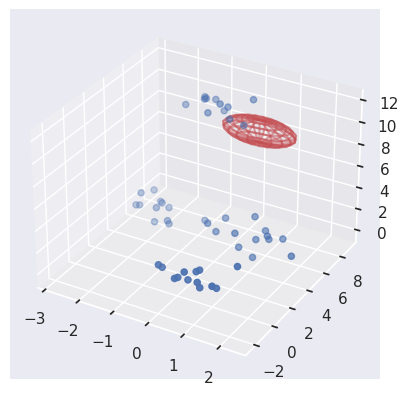

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
sphere = ax.plot_wireframe(*WireframeSphere([1,5,11]), color="r", alpha=0.5)
ax.scatter(X_df[0], X_df[1], X_df[2])

plt.show()

### The algorithms
In comparison to 2D-Laplace there are three separate formulas to generate the PDF. These look a lot like the ones for 2D-Laplace, but use a shape 3 of the gamma distribution and include the azimuth angle.

In [49]:
from scipy.stats import gamma

In [50]:
radius = 0.2 # radius r
level = 2 #privacy level l
epsilon = level/radius
print(epsilon)

10.0


The azimuth ($\psi$) and theta ($\theta$) is generated using this paper: Generalised Differential Privacy for Text Document
Processing

In [370]:
def generate_random_point(X_1, epsilon): 
    u = np.random.rand()
    distribution = gamma(3, scale=1/epsilon)
    D_r = distribution.pdf(X_1)[0]
    # theta = 2 * np.pi * u[0]
    theta = u * np.pi
    #phi = np.arccos(2 * u[1] - 1)
    phi = u * np.pi*2
    return D_r[0] * np.sin(theta) * np.sin(phi), D_r[1] * np.sin(theta) * np.cos(phi), D_r[2] * np.cos(theta)

In [368]:
x_0 = np.array(X_df.iloc[:1])
x_0

array([[1.1641107 , 3.79132988, 0.52347363]])

In [418]:
z = generate_random_point(x_0, epsilon)
x_0_perturbed = x_0 + z
print(x_0_perturbed, z)

[[1.16848483 3.79132988 1.01729794]] (0.00437413018222817, -1.537678381818314e-14, 0.4938243050597434)
